In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

Chapter 8 Planning and Learning with Tabular Methods
============================

+ Model-based methods: planning
+ Model-free methods: learning

the heart of both kinds of methods is the computation of value functions.

### 8.1 Models and Planning

+ a *model* of the enviroment: anything that an agent can use to predict how the environment will respond to its actions.
  - model can be used to *simulate* the environemt and produce *simulated experience*.

+ distribution models: produce a descripiton of all possibilities and their probabilities.
+ sample models: produce just one of the possibilities, sampled according to the probabilities.

##### planning

\begin{equation*}
   \text{model} \xrightarrow{\text{planning}} \text{policy} 
\end{equation*}

+ state-space planning: search through the state space for an optimal policy or an optimal path to a goal.
+ plan-space planning: search through the space of plans. includes: evolutionary methods, partial-order planning.

common structure shared by all state-space planning methods:

\begin{equation*}
    \text{model} \longrightarrow \text{simulated experience} \xrightarrow{\text{backups}} \text{values} \longrightarrow \text{policy}
\end{equation*}

planning uses simulated experience VS learning uses real experience.

### 8.2 Dyna: Integrating Planning, Acting, and Learning

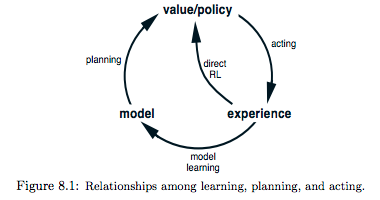

In [3]:
Image('./res/fig8_1.png')

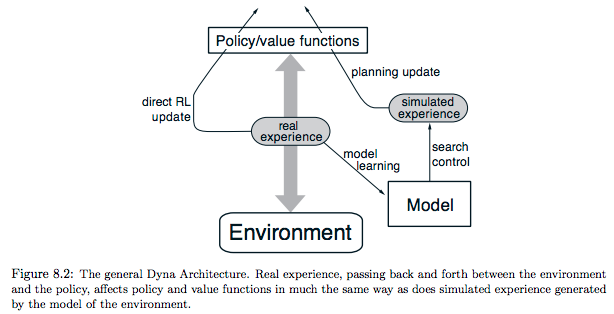

In [4]:
Image('./res/fig8_2.png')

Learning and planning are deeply integrated in the sense that they share almost all the same machinery, differing only in the source of their experience.

+ Indirect methods: make fuller use of a limited amount of experiences.
+ Direct methods: much simpler and are not effected by biases in the design of the model.

### 8.3 When the Model Is Wrong

Models may be incorrect because:

+ Environment is stochastic and only a limited number of samples have been observed;
+ The model was learned using function approximation that has generalized imperfectly;
+ Then environment has changed and its new behavior has not yet been observed:
  - original optimial solution doesn't work any more.
  - better solution exists after environemt changed.
  

=> conflict between exploration and exploitation => simple heuristics are often effective.

Dyna-Q+ agen: keeps track for each state-action pair. The more time that has elapsed, the greater the chance to be picked next time => special "bonus reward": $r + k \sqrt{\tau}$

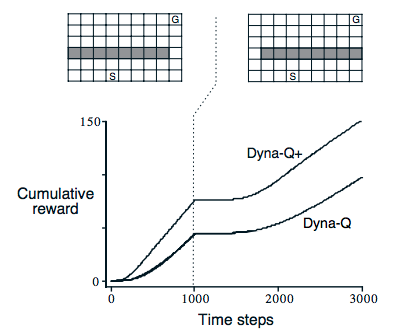

In [2]:
Image('./res/fig8_5.png')

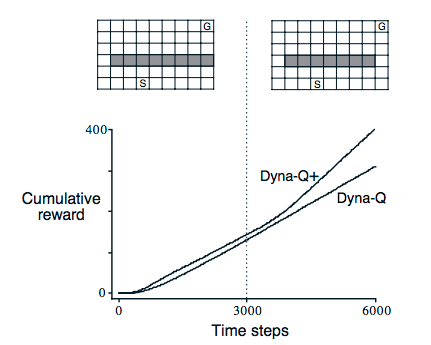

In [3]:
Image('./res/fig8_6.png')

### 8.4 Prioritized Sweeping

uniform selection is usually not the best; planning can be much more efficient if simulated transitions and updates are focused on particular state-action pairs.

*backward focusing* of planning computations: work backward from aribitary states that have changed in value. (propagation)

*prioritized sweeping*: prioritize the updates according to a measure of their urgency, and perform them in order of priority.

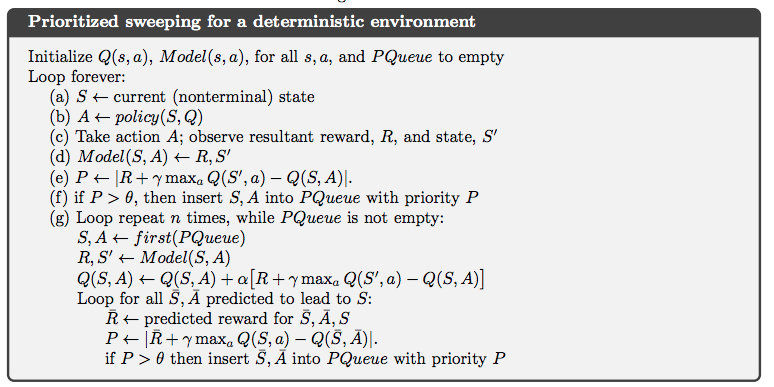

In [4]:
Image('./res/prioritized_sweeping.png')

### 8.5 Expected vs. Sample Updates

Three questions:

1. Whether the algorithm updates state values $v$, or action values $q$?
2. Whether the algorithm estimates the value for the optimal policy $\ast$, or for an arbitrary given policy $\pi$?
3. Whether the updates are expected updates, or sample updates?
   + expected updates: better estimate (uncorrupted by sampling error), but more computation.
   + sample updates: superior on problems with large stochastic branching factors and too many states to be solved exactly.

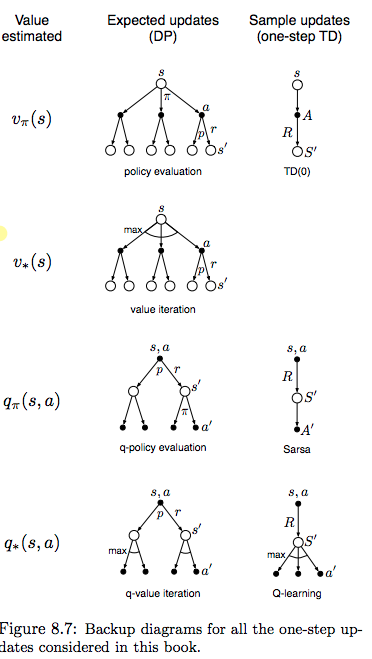

In [5]:
Image('./res/fig8_7.png')

### 8.6 Trajectory Sampling

Two ways of distributing updates:
+ classical approach: sweeps through the entire state space, updating each state once per sweep.
+ sample from the state according to some distribution.
  - *trajectory sampling*: one simulates explicit individual trajectories and performs updates at the state encountered along the way.

### 8.7 Real-time Dynamic Programming

### 8.8 Planning at Decision Time

+ background planning: using simulated experience to gradually improve a policy or value function.
+ decision-time planning: using simulated experience to select an action for the current state. (look much deeper than on-step-ahead and evaluate action choices leading to many different predicted state and reward trajectories).


### 8.9 Heuristic Search

### 8.10 Rollout Algorithms

### 8.11 Monte Carlo Tree Search

### Summary of Part I: Dimensions

three key ideas in common:

1. seek to estimate value functions;
2. operate by backing up values along actual or possible state trajectories;
3. follow the general strategy of generalized policy iteration(GPI).

important dimensions along wich the methods vary:

+ whether they are sample updates or expected updates.
+ the depth of updates (to the degree of boostrapping).
+ on-policy or off-policy.
+ fuction approximation.